Data set from Kaggle: 

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
%pip install catboost matplotlib pandas scikit-learn kaggle optuna ipywidgets shap jupyterlab-rise

  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached matplotlib-3.10.6-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached optuna-4.5.0-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached shap-0.48.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached jupyterlab_rise-0.43.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.2-cp311-cp311-manylinux2014_x8

In [2]:
%pip install plotly kaleido


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pathlib import Path

cwd = Path.cwd()
print("Aktualna ścieżka:", cwd)

Aktualna ścieżka: /workspaces/PZ_ARISA_MLOps_Final


In [4]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)
    
    with open(config_dir / "kaggle.json", "w") as dst:
        with open("./kaggle.json", "r") as src:
            dst.write(src.read())

In [5]:
import os
import zipfile
import shutil
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset_name = "kamilpytlak/personal-key-indicators-of-heart-disease"
download_folder = Path("data/heart-disease")
download_folder.mkdir(parents=True, exist_ok=True)

api.dataset_download_files(dataset_name, path=str(download_folder), unzip=True)

base_dir = Path("data/heart-disease")
file_to_move = base_dir / "2020" / "heart_2020_cleaned.csv"
target_location = base_dir / "heart_2020_cleaned.csv"

# Przenieś plik
if file_to_move.exists():
    shutil.move(str(file_to_move), str(target_location))
    print(f"Przeniesiono: {file_to_move.name} → {target_location}")
else:
    print("Plik nie istnieje:", file_to_move)

# Usuń foldery 2020 i 2022
for folder in ["2020", "2022"]:
    folder_path = base_dir / folder
    if folder_path.exists() and folder_path.is_dir():
        shutil.rmtree(folder_path)
        print(f"Usunięto folder: {folder_path}")
    else:
        print(f"Folder nie istnieje: {folder_path}")


Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
Przeniesiono: heart_2020_cleaned.csv → data/heart-disease/heart_2020_cleaned.csv
Usunięto folder: data/heart-disease/2020
Usunięto folder: data/heart-disease/2022


In [6]:
#!dir "./data/heart-disease"

from pathlib import Path

folder = Path("./data/heart-disease")
for item in folder.iterdir():
    if item.is_file():
        print(f"{item.name}: {item.stat().st_size:,} bajtów")

heart_2020_cleaned.csv: 25,189,554 bajtów


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(download_folder / "heart_2020_cleaned.csv")
df['HeartDisease'] = (df['HeartDisease'] == "Yes").astype(int)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['HeartDisease'])


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63959 entries, 229267 to 181730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      63959 non-null  int64  
 1   BMI               63959 non-null  float64
 2   Smoking           63959 non-null  object 
 3   AlcoholDrinking   63959 non-null  object 
 4   Stroke            63959 non-null  object 
 5   PhysicalHealth    63959 non-null  float64
 6   MentalHealth      63959 non-null  float64
 7   DiffWalking       63959 non-null  object 
 8   Sex               63959 non-null  object 
 9   AgeCategory       63959 non-null  object 
 10  Race              63959 non-null  object 
 11  Diabetic          63959 non-null  object 
 12  PhysicalActivity  63959 non-null  object 
 13  GenHealth         63959 non-null  object 
 14  SleepTime         63959 non-null  float64
 15  Asthma            63959 non-null  object 
 16  KidneyDisease     63959 non-null  objec

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255836 entries, 143355 to 241203
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      255836 non-null  int64  
 1   BMI               255836 non-null  float64
 2   Smoking           255836 non-null  object 
 3   AlcoholDrinking   255836 non-null  object 
 4   Stroke            255836 non-null  object 
 5   PhysicalHealth    255836 non-null  float64
 6   MentalHealth      255836 non-null  float64
 7   DiffWalking       255836 non-null  object 
 8   Sex               255836 non-null  object 
 9   AgeCategory       255836 non-null  object 
 10  Race              255836 non-null  object 
 11  Diabetic          255836 non-null  object 
 12  PhysicalActivity  255836 non-null  object 
 13  GenHealth         255836 non-null  object 
 14  SleepTime         255836 non-null  float64
 15  Asthma            255836 non-null  object 
 16  KidneyDisease     25

In [10]:
y_train = df_train.pop("HeartDisease")
X_train = df_train

In [11]:
y_test = df_test.pop("HeartDisease")
X_test = df_test

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255836 entries, 143355 to 241203
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               255836 non-null  float64
 1   Smoking           255836 non-null  object 
 2   AlcoholDrinking   255836 non-null  object 
 3   Stroke            255836 non-null  object 
 4   PhysicalHealth    255836 non-null  float64
 5   MentalHealth      255836 non-null  float64
 6   DiffWalking       255836 non-null  object 
 7   Sex               255836 non-null  object 
 8   AgeCategory       255836 non-null  object 
 9   Race              255836 non-null  object 
 10  Diabetic          255836 non-null  object 
 11  PhysicalActivity  255836 non-null  object 
 12  GenHealth         255836 non-null  object 
 13  SleepTime         255836 non-null  float64
 14  Asthma            255836 non-null  object 
 15  KidneyDisease     255836 non-null  object 
 16  SkinCancer        25

In [13]:
import joblib
import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv

outfolder = Path("results")
outfolder.mkdir(parents=True, exist_ok=True)

best_params_path = outfolder / "best_params.pkl"

# Określ kolumny kategoryczne
categorical_features = [
    "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", 
    "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", 
    "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"
]
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features if col in X_train.columns]

if not best_params_path.is_file():
    # DODAJ stratify=y_train
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
    )
    
    def objective(trial):
        params = {
            "depth": trial.suggest_int("depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3),
            "iterations": trial.suggest_int("iterations", 100, 300),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-5, 100.0, log=True),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.01, 1),
            "random_strength": trial.suggest_float("random_strength", 1e-5, 100.0, log=True),
            "auto_class_weights": "Balanced"  # ⭐ DODAJ TO
        }
        model = CatBoostClassifier(
            **params, 
            verbose=0, 
            cat_features=categorical_indices,
            random_seed=42
        )
        model.fit(
            X_train_opt, 
            y_train_opt, 
            eval_set=(X_val_opt, y_val_opt), 
            early_stopping_rounds=50
        )
        return model.get_best_score()["validation"]["Logloss"]
    
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=50)
    
    joblib.dump(study.best_params, best_params_path)
    params = study.best_params
else:
    params = joblib.load(best_params_path)

print("Best Parameters:", params)

Best Parameters: {'depth': 3, 'learning_rate': 0.29946628479494963, 'iterations': 298, 'l2_leaf_reg': 6.489964129571064, 'bagging_temperature': 0.5948399857962691, 'random_strength': 2.4795266973526418}


In [14]:
params["eval_metric"] = "F1"
params["loss_function"] = "Logloss"
params["auto_class_weights"] = "Balanced"  

model = CatBoostClassifier(
    **params,
    verbose=True,
    cat_features=categorical_indices,
    random_seed=42
)

data = Pool(X_train, y_train, cat_features=categorical_indices)

cv_results = cv(
    params=params,
    pool=data,
    fold_count=5,
    partition_random_seed=42,
    shuffle=True,
    stratified=True  
)

cv_results.to_csv(outfolder / "cv_results.csv", index=False)

Training on fold [0/5]
0:	learn: 0.6973447	test: 0.6956044	best: 0.6956044 (0)	total: 338ms	remaining: 1m 40s
1:	learn: 0.7443595	test: 0.7442392	best: 0.7442392 (1)	total: 449ms	remaining: 1m 6s
2:	learn: 0.7386166	test: 0.7373217	best: 0.7442392 (1)	total: 582ms	remaining: 57.3s
3:	learn: 0.7608203	test: 0.7590926	best: 0.7590926 (3)	total: 693ms	remaining: 51s
4:	learn: 0.7663129	test: 0.7661870	best: 0.7661870 (4)	total: 805ms	remaining: 47.2s
5:	learn: 0.7586578	test: 0.7556890	best: 0.7661870 (4)	total: 918ms	remaining: 44.7s
6:	learn: 0.7617903	test: 0.7630652	best: 0.7661870 (4)	total: 1.04s	remaining: 43.1s
7:	learn: 0.7658842	test: 0.7668088	best: 0.7668088 (7)	total: 1.15s	remaining: 41.7s
8:	learn: 0.7664228	test: 0.7674412	best: 0.7674412 (8)	total: 1.28s	remaining: 41s
9:	learn: 0.7663547	test: 0.7662782	best: 0.7674412 (8)	total: 1.4s	remaining: 40.3s
10:	learn: 0.7668032	test: 0.7674357	best: 0.7674412 (8)	total: 1.51s	remaining: 39.3s
11:	learn: 0.7655679	test: 0.76669

In [15]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Konwertuj do numpy arrays
iterations = cv_results["iterations"].values
mean_f1 = cv_results["test-F1-mean"].values
std_f1 = cv_results["test-F1-std"].values

# Add shaded error region NAJPIERW (żeby była pod linią)
fig.add_trace(
    go.Scatter(
        x=np.concatenate([iterations, iterations[::-1]]),
        y=np.concatenate([mean_f1 + std_f1, (mean_f1 - std_f1)[::-1]]),
        fill="toself",
        fillcolor="rgba(0, 0, 255, 0.2)",
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip',
        name='±1 std'
    )
)

# Add mean performance line
fig.add_trace(
    go.Scatter(
        x=iterations,
        y=mean_f1,
        mode="lines",
        name="Mean F1 Score",
        line=dict(color="blue", width=2)
    )
)

# Customize layout
fig.update_layout(
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xaxis_title="Training Steps",
    yaxis_title="Performance Score",
    template="plotly_white",
    yaxis=dict(range=[0.5, 1]),
    hovermode='x unified'
)

fig.show()

try:
    fig.write_image(outfolder / "test_f1.png")
    print("Wykres zapisany przez plotly")
except Exception as e:
    print(f"Błąd plotly: {e}")
    print("Używam matplotlib...")
    
    # Fallback do matplotlib
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(iterations, mean_f1 - std_f1, mean_f1 + std_f1, 
                     alpha=0.2, color='blue', label='±1 std')
    plt.plot(iterations, mean_f1, 'b-', linewidth=2, label='Mean F1 Score')
    
    plt.title("Cross-Validation (N=5) Mean F1 score with Error Bands")
    plt.xlabel("Training Steps")
    plt.ylabel("Performance Score")
    plt.ylim(0.5, 1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.savefig(outfolder / "test_f1.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("Wykres zapisany przez matplotlib")

/tmp/ipykernel_4690/1819983254.py:50: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




Wykres zapisany przez plotly


In [16]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add mean performance line
fig.add_trace(
    go.Scatter(
        x=cv_results["iterations"], y=cv_results["test-Logloss-mean"], mode="lines", name="Mean logloss", line=dict(color="blue")
    )
)

# Add shaded error region
fig.add_trace(
    go.Scatter(
        x=pd.concat([cv_results["iterations"], cv_results["iterations"][::-1]]),
        y=pd.concat([cv_results["test-Logloss-mean"]+cv_results["test-Logloss-std"], 
                     cv_results["test-Logloss-mean"]-cv_results["test-Logloss-std"]]),
        fill="toself", 
        fillcolor="rgba(0, 0, 255, 0.2)",
        line=dict(color="rgba(255, 255, 255, 0)"),
        showlegend=False
    )
)

# Customize layout
fig.update_layout(
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xaxis_title="Training Steps",
    yaxis_title="Logloss",
    template="plotly_white"
)

fig.show()

fig.write_image(outfolder / "test_logloss.png")

/tmp/ipykernel_4690/918962435.py:36: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [17]:
model.fit(
    X_train,
    y_train,
    verbose_eval=50,
    early_stopping_rounds=50,
    use_best_model=False,
    plot=True
)

model.save_model(outfolder / 'catboost_model_HeartDisease.cbm')
joblib.dump(params, outfolder / 'model_params.pkl')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7159784	total: 528ms	remaining: 2m 36s
50:	learn: 0.7749355	total: 13.5s	remaining: 1m 5s
100:	learn: 0.7765167	total: 20.4s	remaining: 39.8s
150:	learn: 0.7779497	total: 28.2s	remaining: 27.4s
200:	learn: 0.7787605	total: 35.6s	remaining: 17.2s
250:	learn: 0.7792271	total: 43.1s	remaining: 8.07s
297:	learn: 0.7801017	total: 50.1s	remaining: 0us


['results/model_params.pkl']

In [18]:
model.predict(df_test)

array([1, 0, 0, ..., 1, 1, 1], shape=(63959,))

In [19]:
preds = model.predict(df_test[X_train.columns])

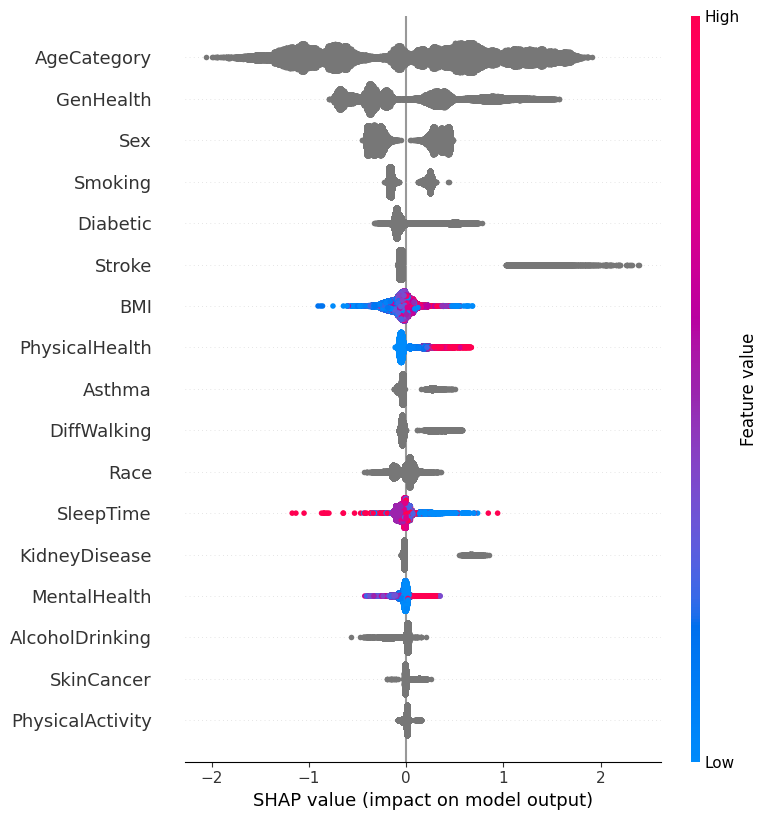

In [20]:
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_test)

shap.summary_plot(shap_values, df_test, show=False)
plt.savefig(outfolder / "test_shap_overall.png")

In [21]:
df_test["target"] = preds
df_test.to_csv(outfolder / "predictions.csv", index=False)